## Homework 5: Dimensionality Reduction and Clustering

First we need to import the packages, as usual.

In [2]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Importing the MNIST Dataset

We'll call the data X and the labels y, for lack of better names.

In [48]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X = mnist.data
y = mnist.target

To be safe, we'll check the shape of the data.

In [49]:
X.shape

(70000, 784)

In [50]:
y.shape

(70000,)

Everything is looking good.

Now we scale the data. We won't worry about a train/test split here, since we aren't actually training a model; just reducing and visualizing the data.

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
train_img = scaler.transform(X)

C:\Users\iriley\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### (1) Use PCA to reduce the dimensionality

First import the necessary function, then make the model.

In [52]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(.95)

Now we create data with a lower dimension.

In [67]:
lower_dimensional_data = pca.fit_transform(X)

We will also make an approximation of the reduced data using an inverse transform:

In [68]:
approximation = pca.inverse_transform(lower_dimensional_data)

Let's take a look at the PCS-transformed images:

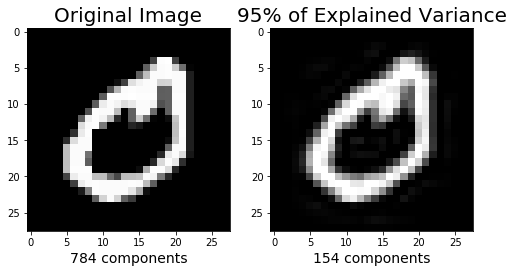

In [56]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X[1].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

Seems about right.

In [57]:
tot = sum(pca.explained_variance_)
tot

3259722.681694598

We want to see how much of the variance was explained relative to the entire variance, and we'll look at that for the first few components.

In [58]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[10.255291448436687, 7.529273226907803, 6.470806727523773, 5.685678642538776, 5.144350878243918]


Now for the total:

In [59]:
tot = sum(pca.explained_variance_)
tot

3259722.681694598

And we'll want to make a cumulative list of explained variance so that we can graph it:

In [61]:
cum_var_exp = np.cumsum(var_exp)

Let's see what that looks like visually:

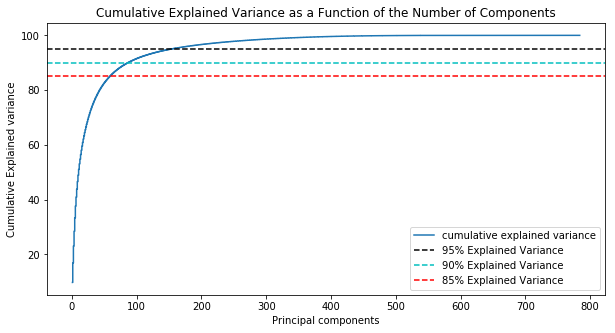

In [19]:
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

In [20]:
# Indices corresponding to the first occurrence are returned with the np.argmax function
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
componentsVariance = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]

In [63]:
componentsVariance = 1

In [62]:
#componentsVariance

I found a useful function that will allow me to specify how much variance I want explained and then output the data with the PCA transform.

In [64]:
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

Here is the function with examples at 99%, 95%, 90%, and 85% of variance explained.

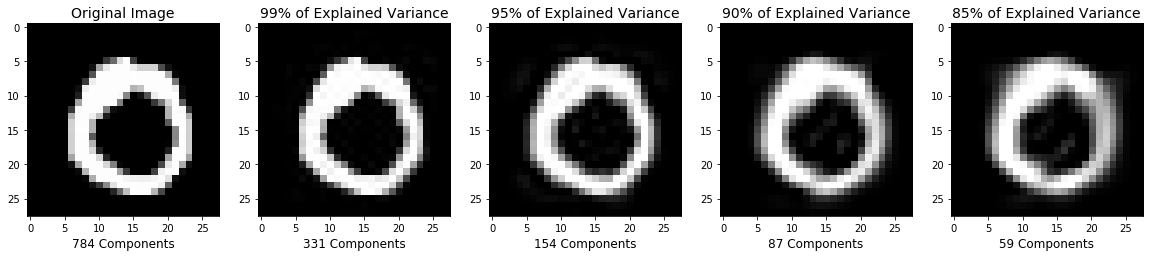

In [65]:
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(X[5].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, X)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, X)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.85, X)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.75, X)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);

I want to find a tradeoff somewhere between the amount of data I keep and the recognizability of the letters. I think 75% shows a good tradeoff between data simplification and key features. This way, I can remove a lot of the non-essential features while keeping what should be the most important features for classification. I will keep 50 components, since I think the letters will still be generally recognizable with just the first 50.

#### a. How many components did you use? Why?

I chose 154, since that allows us to 

#### b. Plot the first two components. Do you notice any trends? What is this plot showing us?

#### c. Why would you use PCA? What is it doing? And what are the drawbacks?

#### d. Plot some of the images, then compress them using PCA and plot again. How does it look?

### 2 Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

First, we need to import the t-sne packages.

In [7]:
from sklearn import manifold
from time import time

We also need to define our data.

In [8]:
n_samples, n_features = X.shape
n_neighbors = 30

In [9]:
print(X.shape)

(70000, 784)


Let's first just look at a few of the digits again.

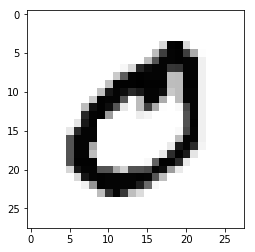

In [10]:
plt.imshow(X[1].reshape((28,28)), cmap='Greys')

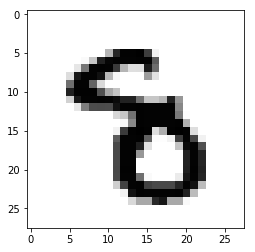

In [11]:
plt.imshow(X[50000].reshape((28,28)), cmap='Greys')

Not perfect handwriting, but nothing a good program shouldn't be able to handle.

In [39]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

First reduce dimensionality before feeding to t-sne. From the pictures above, it seems that 50 components should be sufficient.

In [34]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

n_select = 10000

We'll want to pick a subset of the data, since t-sne takes a long time to run.

In [71]:
df_pca = pd.DataFrame(X_pca[:n_select, :2], columns=['comp1', 'comp2'])
df_pca['label'] = y[rows[:n_select]]

Let's take a look at the PCA-reduced data and see how they are.

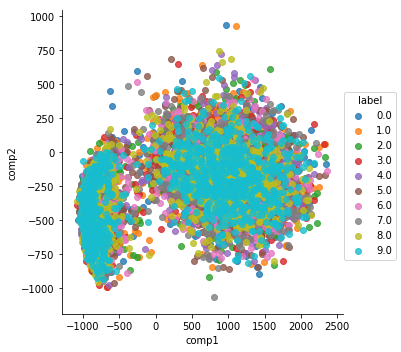

In [28]:
sns.lmplot(x='comp1', y='comp2', hue='label', data=df_pca, fit_reg=False)

So there is still a lot of work to do. Let's see if t-sne does any better.

In [38]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.024s...
[t-SNE] Computed neighbors for 10000 samples in 8.427s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 356.277598
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.572685
[t-SNE] Error after 1000 iterations: 1.697376


In [40]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

Now we plot the first two (only) components:

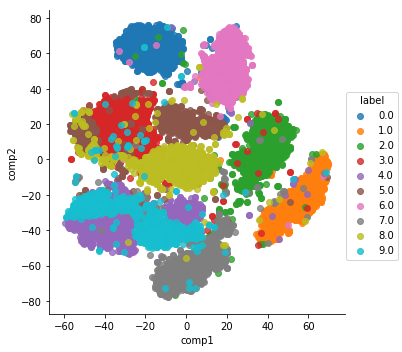

In [41]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

This looks pretty good - t-sne shows clear patterns of clustering in the data.

We'll also want to check its robustness to changes in perplexity.

In [42]:
tsne2 = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000, learning_rate=200)
tsne_results2 = tsne2.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.023s...
[t-SNE] Computed neighbors for 10000 samples in 8.495s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 347.422743
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.895531
[t-SNE] Error after 1000 iterations: 1.738494


In [44]:
df_tsne2 = pd.DataFrame(tsne_results2, columns=['comp1', 'comp2'])
df_tsne2['label'] = y[rows[:n_select]]

And plot it again:

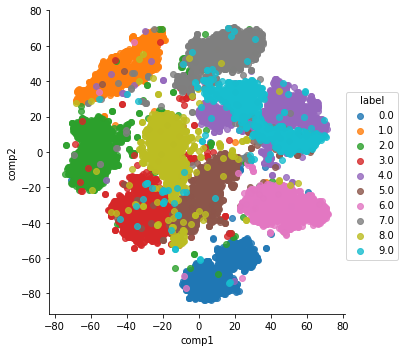

In [45]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne2, hue='label', fit_reg=False)

The data seem to have been flipped, but that's not of concern. What we were interested in was how robust the t-sne method was to changes in perplexity, and the clustering seems to have worked quite well in both, so it is robust.

#### a. How does this plot differ from your PCA plot?

There are noticeable, distinct clusters.

#### b. How robust is it to changes in perplexity?

T-sne transformed data is quite robust to changes in perplexity, which is smooth measure of the effective number of neighbors. One source says it is 

#### c. How robust is it to different learning rate and number of iterations?

Learning rate and number of iterations are not as likely to be affected by small changes on the t-sne data, because there is separation between the clusters. That will make learning on this data much more robust.

###  3 Perform k-means clustering:

First import the necessary packages:

In [14]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

We also want to choose a subset of the reduced-dimensionality data earlier:

In [ ]:
X_km = X_pca[rows[:n_select],:]

We need to specify hyperparameters:

In [16]:
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)

And run the model:

In [17]:
kmeans.fit(X_km)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=50, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

And predict:

In [18]:
sk_clusters = kmeans.predict(X_km)

In [19]:
sk_clusters

array([2, 5, 9, ..., 5, 7, 6])

Let's see how the number of clusters affects the model:

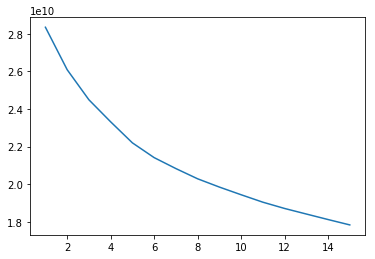

In [36]:
sses = []
for k in range(1,16):
    kmeans = KMeans(n_clusters=k, n_init=50, n_jobs=-1)
    kmeans.fit(X_km)
    sses.append(kmeans.inertia_)
plt.plot(range(1,16), sses)

Hmmm... there doesn't seem to be a natural elbow, so I will stick with my earlier choice by using 10 clusters, given what I know about the data.

#### a. How did you choose k?

I chose it from an inherent characteristic of the data - the number of classes it contains.

#### b. How did you evaluate your clustering?

Using a graph of the inertia obtained by using different numbers of clusters.

#### c. Visualize your clusters using t-sne

In [ ]:
df_km = df_tsne['comp1', 'comp2']
df_km['label'] = sk_clusters[rows[:n_select]]

In [ ]:
sns.lmplot(x='comp1', y='comp2', data=df_km, hue='label', fit_reg=False)

#### d. Did you scale your data?

Yes, I did, using the StandardScale function from Scikit-Learn.

### 4 Perform hierarchical clustering:

#### a. Plot your dendrogram

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
Now I will view my first dendrogram.

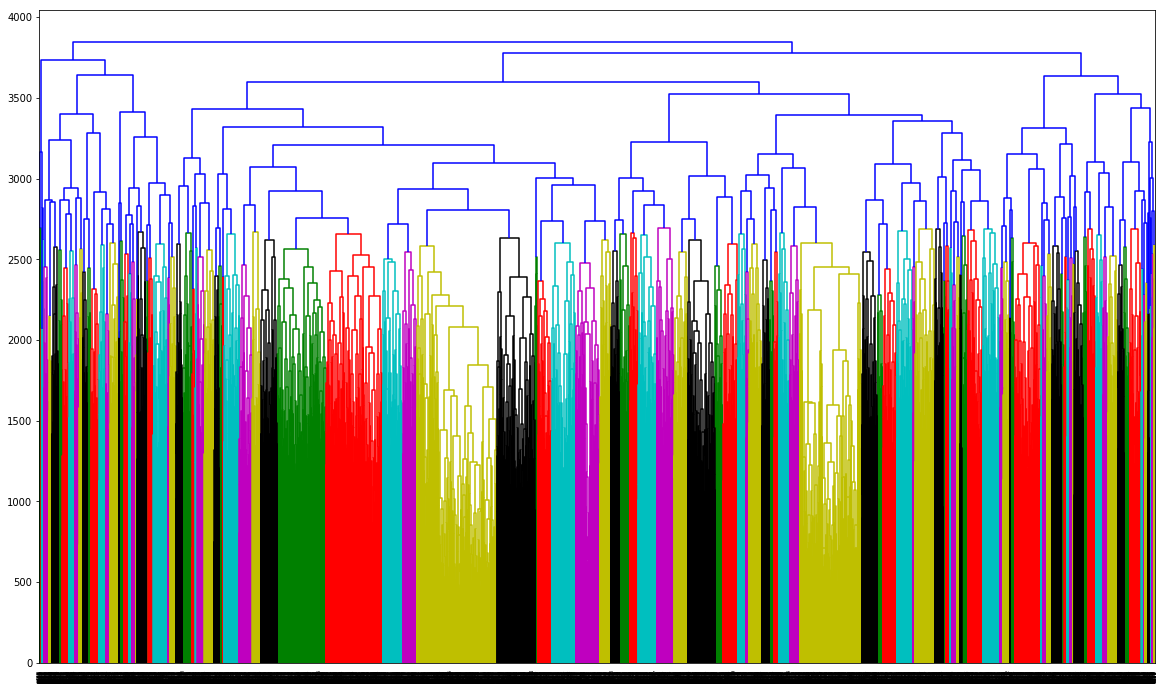

In [21]:
X_d1 = linkage(X_km, 'complete')
plt.figure(figsize=(20, 12))
_ = dendrogram(X_d1)

#### b. How many clusters seem reasonable based off your graph?

This is a tough call, but I would say 10 still seems reasonable, even though there is probably a wide range of numbers that would work. Ten will require us to put up with more variation in some clusters, especially the last one on the dendrogram, but any more and we are going to have to split up relatively tight clusters.

#### c. How does your dendrogram change with different linkage methods?

I will try all of the different options for the linkage function to see what kind of an effect they have.

In [ ]:
X_d2 = linkage(X_km, 'single')
plt.figure(figsize=(20, 12))
_ = dendrogram(X_d2)

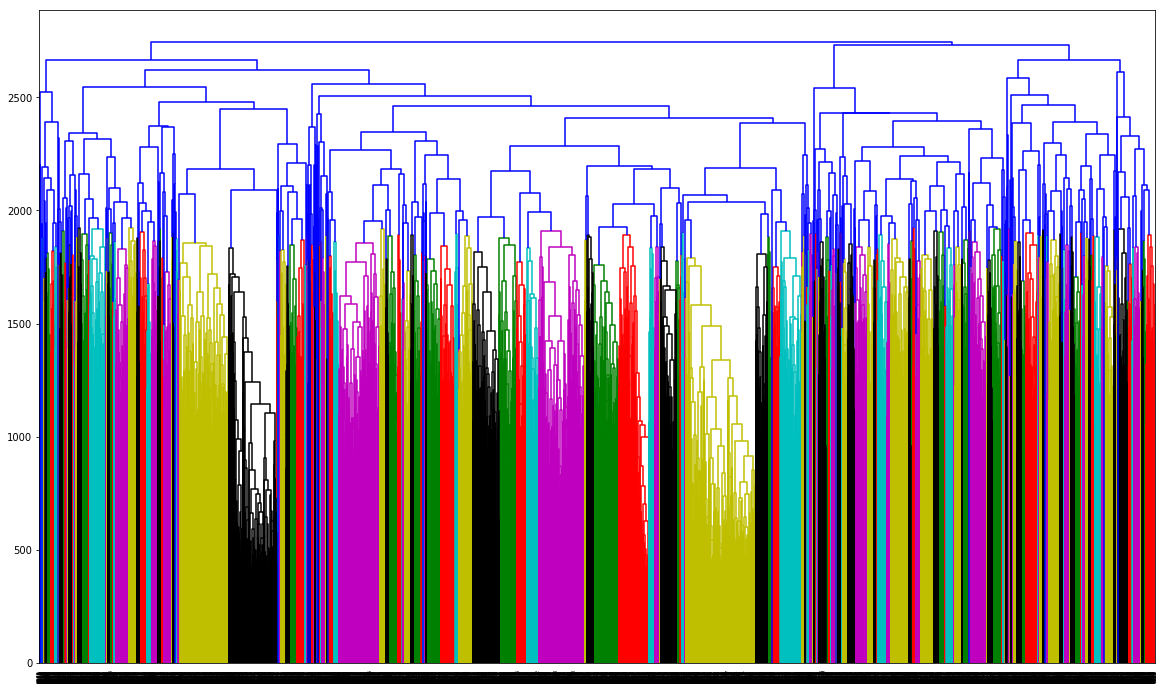

In [ ]:
X_d3 = linkage(X_km, 'weighted')
plt.figure(figsize=(20, 12))
_ = dendrogram(X_d3)

My kernel kept dying in the middle of running these, so I'm not able to include them right now, but these are some interesting variations on the dendrogram.

In [ ]:
X_d4 = linkage(X_km, 'average')
plt.figure(figsize=(20, 12))
_ = dendrogram(X_d4)

In [ ]:
X_d5 = linkage(X_km, 'centroid')
plt.figure(figsize=(20, 12))
_ = dendrogram(X_d5)

In [ ]:
X_d6 = linkage(X_km, 'median')
plt.figure(figsize=(20, 12))
_ = dendrogram(X_d6)

In [ ]:
X_d7 = linkage(X_km, 'ward')
plt.figure(figsize=(20, 12))
_ = dendrogram(X_d7)